### Connect duckdb in python


In [10]:
import duckdb

with duckdb.connect("database/jokes.duckdb") as conn:
    conn.sql("DROP TABLE IF EXISTS jokes;")
    conn.sql("""--sql
              CREATE TABLE IF NOT EXISTS jokes (
              id INT,
              joke STRING);
""")

    conn.sql("""--sql
        INSERT INTO jokes VALUES 
             (1, 'Why do programmers hate sunlight , because '),
             (2, 'why are you happy, beacause');
             """)

    desc = conn.sql("DESC;").df()

In [7]:
desc

,database,schema,name,column_names,column_types,temporary
0,jokes,main,jokes,"[id, joke]","[INTEGER, VARCHAR]",False


In [ ]:
with duckdb.connect("database/jokes.duckdb") as conn:
    jokes = conn.sql("FROM jokes").df()

jokes

,id,joke
0,1,"Why do programmers hate sunlight , because"
1,2,"why are you happy, beacause"


In [ ]:
jokes["joke"]

0    Why do programmers hate sunlight , because 
1                    why are you happy, beacause
Name: joke, dtype: object

### Ingest a cdv file into duckdb


--we can open a csv file without a database connection


In [13]:
duckdb.sql("FROM 'data/financial_data.csv'").df().head()

,transaction_id,date,company,transaction_type,category,amount,currency,account_number,description,status,payment_method,tax_amount,net_amount
0,TXN1000,2024-01-15,UnitedHealth Group,Investment,Marketing,498789.60,JPY,ACC90616,Q1 revenue for r&d,Completed,Check,15640.11,483149.49
1,TXN1001,2024-12-22,Broadcom Inc,Expense,Administrative,407890.44,GBP,ACC72475,Q4 capital gain for it,Completed,Wire Transfer,25883.85,382006.59
2,TXN1002,2024-10-11,Starbucks,Capital Gain,Operations,363927.61,USD,ACC26222,Q3 expense for administrative,Pending,ACH,24814.56,339113.05
3,TXN1003,2024-09-30,Lockheed Martin,Dividend,R&D,336378.01,EUR,ACC86805,Q4 investment for marketing,Completed,Check,46359.17,290018.84
4,TXN1004,2024-07-02,IBM Corp,Operating Cost,Administrative,193284.51,GBP,ACC72617,Q2 expense for distribution,Completed,Credit Card,41529.35,151755.16


In [ ]:
finance = duckdb.sql("FROM 'data/financial_data.csv'").df()
finance.head()

,transaction_id,date,company,transaction_type,category,amount,currency,account_number,description,status,payment_method,tax_amount,net_amount
0,TXN1000,2024-01-15,UnitedHealth Group,Investment,Marketing,498789.60,JPY,ACC90616,Q1 revenue for r&d,Completed,Check,15640.11,483149.49
1,TXN1001,2024-12-22,Broadcom Inc,Expense,Administrative,407890.44,GBP,ACC72475,Q4 capital gain for it,Completed,Wire Transfer,25883.85,382006.59
2,TXN1002,2024-10-11,Starbucks,Capital Gain,Operations,363927.61,USD,ACC26222,Q3 expense for administrative,Pending,ACH,24814.56,339113.05
3,TXN1003,2024-09-30,Lockheed Martin,Dividend,R&D,336378.01,EUR,ACC86805,Q4 investment for marketing,Completed,Check,46359.17,290018.84
4,TXN1004,2024-07-02,IBM Corp,Operating Cost,Administrative,193284.51,GBP,ACC72617,Q2 expense for distribution,Completed,Credit Card,41529.35,151755.16


In [15]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    50 non-null     object        
 1   date              50 non-null     datetime64[us]
 2   company           50 non-null     object        
 3   transaction_type  50 non-null     object        
 4   category          50 non-null     object        
 5   amount            50 non-null     float64       
 6   currency          50 non-null     object        
 7   account_number    50 non-null     object        
 8   description       50 non-null     object        
 9   status            50 non-null     object        
 10  payment_method    50 non-null     object        
 11  tax_amount        50 non-null     float64       
 12  net_amount        50 non-null     float64       
dtypes: datetime64[us](1), float64(3), object(9)
memory usage: 5.2+ KB


In [ ]:
finance["category"].value_counts()

category
Operations        8
Legal             6
Sales             5
Administrative    5
HR                5
Distribution      5
IT                5
Marketing         4
R&D               4
Manufacturing     3
Name: count, dtype: int64

In [24]:
df_category_amount = duckdb.sql(""" 
SELECT category, SUM(amount) AS TOTAL_AMOUNT
FROM finance
           GROUP BY category
           ORDER BY total_amount DESC""").df()
df_category_amount

,category,TOTAL_AMOUNT
0,Operations,2516205.96
1,Administrative,1524607.15
2,Marketing,1434237.33
3,IT,1272719.86
4,Distribution,1266188.51
5,R&D,1223866.29
6,Manufacturing,1140503.86
7,Sales,1086062.70
8,Legal,923504.37
9,HR,301675.46


<Axes: title={'center': 'Total amount per category'}, xlabel='category', ylabel='total amount'>

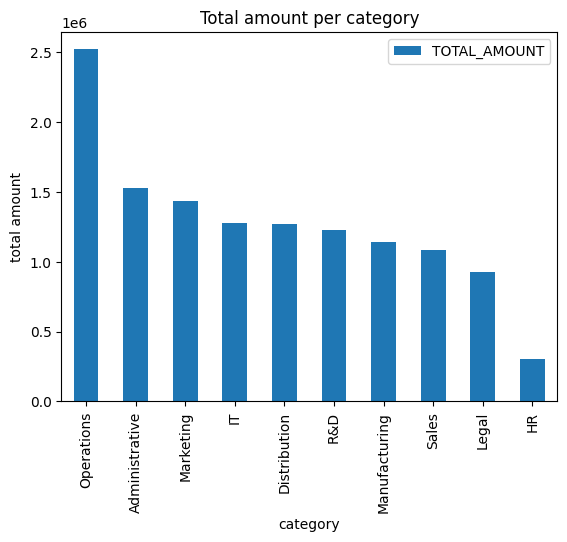

In [ ]:
df_category_amount.plot(
    x="category",
    y="TOTAL_AMOUNT",
    kind="bar",
    title="Total amount per category",
    xlabel="category",
    ylabel="total amount",
)

### read several csv files

In [31]:
duckdb.sql("FROM 'data/hotel_bookings*.csv'").df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   booking_id           15 non-null     object        
 1   guest_name           15 non-null     object        
 2   check_in             15 non-null     datetime64[us]
 3   check_out            15 non-null     datetime64[us]
 4   room_type            15 non-null     object        
 5   guests               15 non-null     int64         
 6   price_sek_per_night  15 non-null     int64         
 7   breakfast            15 non-null     bool          
 8   source               15 non-null     object        
 9   status               15 non-null     object        
dtypes: bool(1), datetime64[us](2), int64(2), object(5)
memory usage: 1.2+ KB
